### <b>classify the Size_Categorie using SVM

<b>month	month of the year: 'jan' to 'dec'

day	day of the week: 'mon' to 'sun'

FFMC	FFMC index from the FWI system: 18.7 to 96.20

DMC	DMC index from the FWI system: 1.1 to 291.3

DC	DC index from the FWI system: 7.9 to 860.6

ISI	ISI index from the FWI system: 0.0 to 56.10

temp	temperature in Celsius degrees: 2.2 to 33.30

RH	relative humidity in %: 15.0 to 100

wind	wind speed in km/h: 0.40 to 9.40

rain	outside rain in mm/m2 : 0.0 to 6.4

Size_Categorie 	the burned area of the forest ( Small , Large)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving forestfires.csv to forestfires (2).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['forestfires.csv']))

In [ ]:
pd.set_option('display.max_columns',None)
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [ ]:
df.shape

(517, 31)

In [ ]:
len(df)

517

In [ ]:
df.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [ ]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.duplicated().sum()

8

In [ ]:
df[df.duplicated(keep=False)]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
52,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,small
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,small
99,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
214,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,large
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,large
302,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,small
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,small
425,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [ ]:
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
df[df.duplicated(keep=False)]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category


In [ ]:
df.shape

(509, 31)

In [ ]:
df.month.value_counts()

aug    178
sep    172
mar     53
jul     32
feb     20
jun     16
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [ ]:
df.day.value_counts()

sun    94
fri    83
sat    82
mon    74
tue    63
thu    60
wed    53
Name: day, dtype: int64

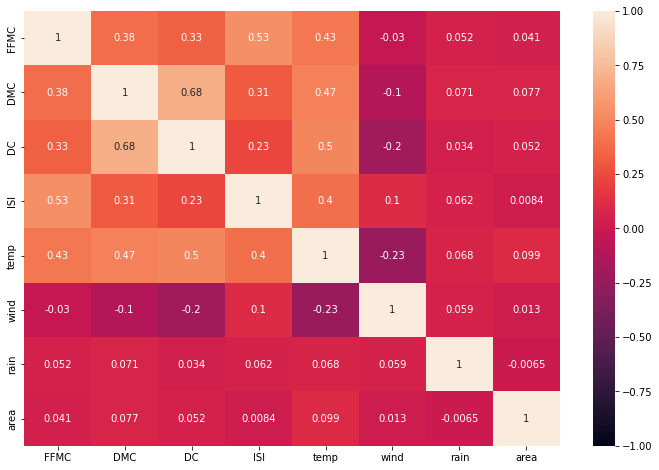

In [ ]:
correlation = df.select_dtypes(include='float64').corr()
plt.figure(figsize=(12,8))
sns.heatmap(data=correlation,
           vmin=-1,vmax=1,
           annot=True);

<font color='purple'><b>From the fig., the burned area of forest has positive correlation with Duff Moisture Code index (DMC) and also high positive correlation with temperature of the area.

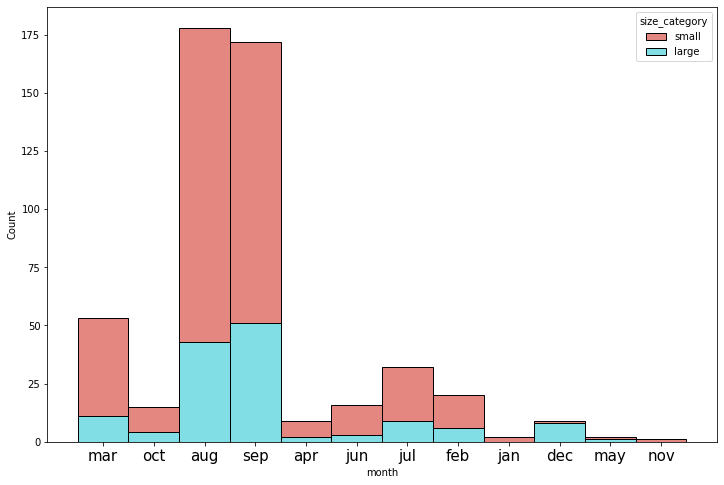

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(binwidth=0.5, x="month", hue="size_category", data=df, stat="count", multiple="stack",palette='hls')
plt.xticks(fontsize=15);

<font color='cyan'><b>From the plot, there were more forest fires during the months of august and september and large areas have been burnt. And there were no large areas burnt during the months of january and november and overall only small areas were burnt.

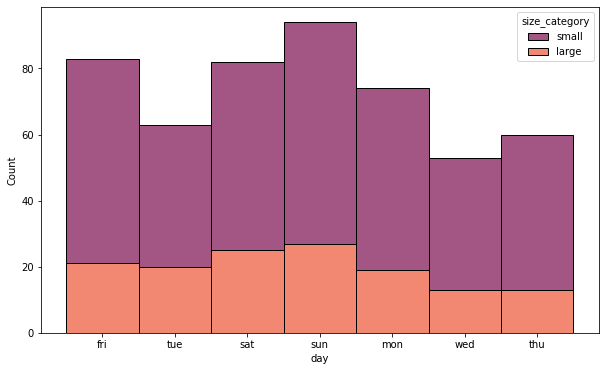

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(x="day", hue="size_category", data=df, stat="count", multiple="stack",palette='rocket');

In [ ]:
pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


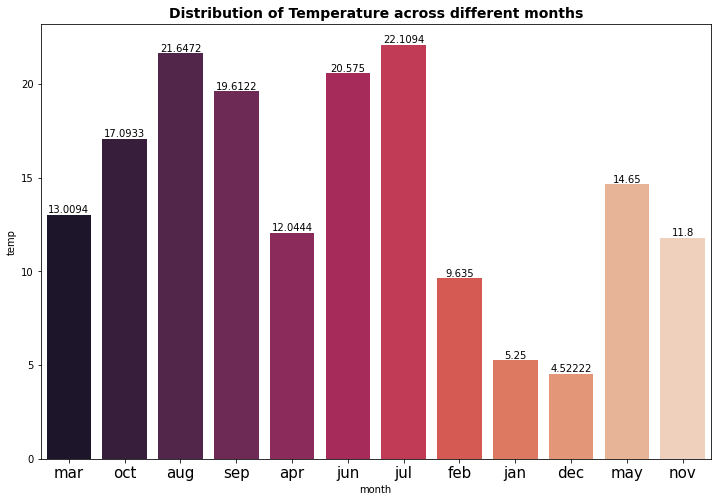

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="month", y='temp', data=df,palette='rocket',ci=None)
plt.title('Distribution of Temperature across different months',fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize=15);
for i in ax.containers:
    ax.bar_label(i,)

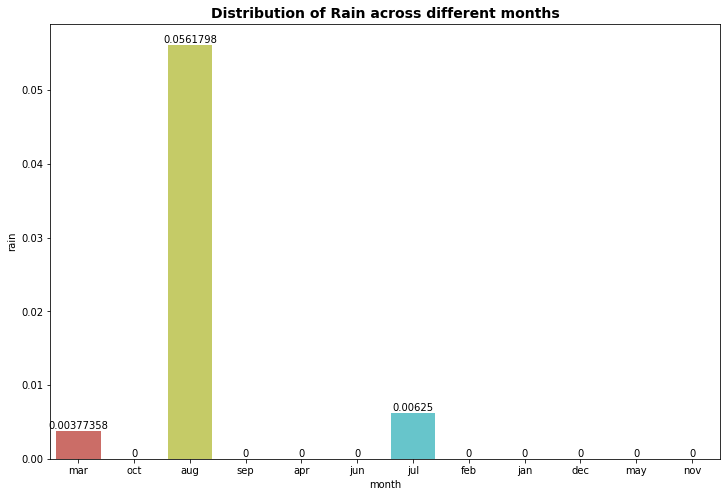

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="month", y='rain', data=df,palette='hls',ci=None)
plt.title('Distribution of Rain across different months',fontsize = 14, fontweight = 'bold');
for i in ax.containers:
    ax.bar_label(i,)

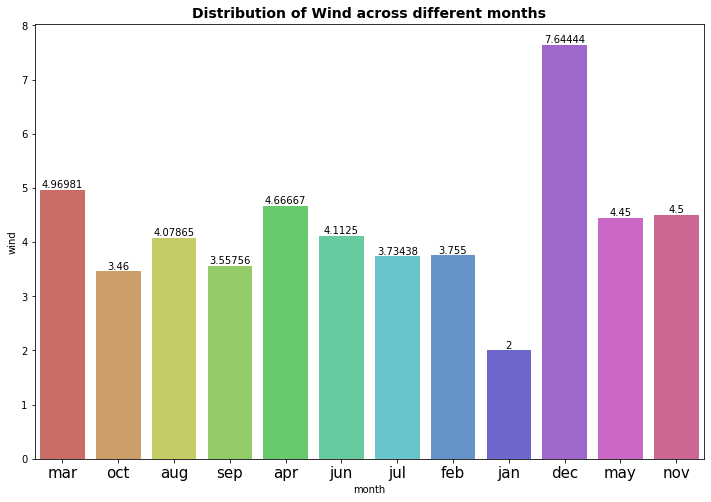

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="month", y='wind', data=df,palette='hls',ci=None)
plt.title('Distribution of Wind across different months',fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize=15);
for i in ax.containers:
    ax.bar_label(i,)

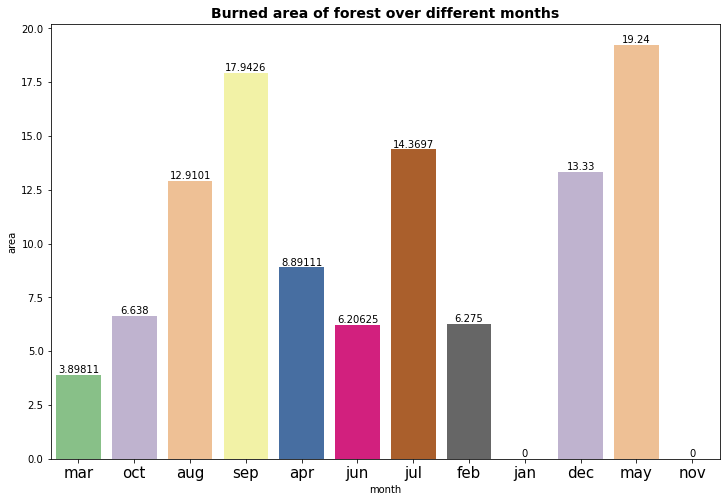

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="month", y='area', data=df,palette='Accent',ci=None)
plt.title('Burned area of forest over different months',fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize=15);
for i in ax.containers:
    ax.bar_label(i,)

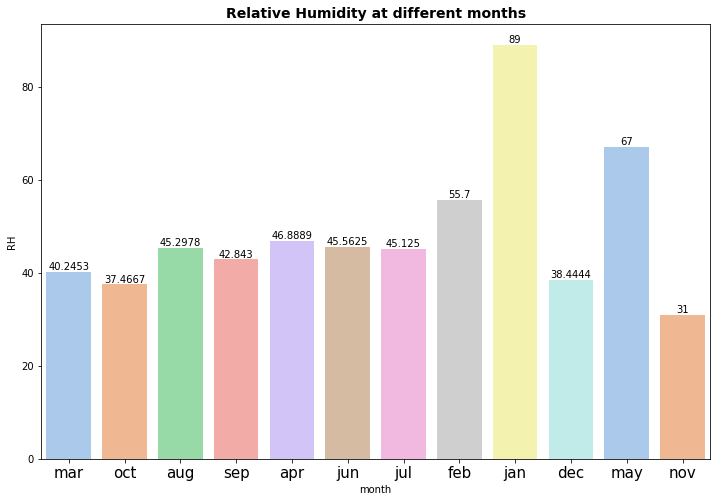

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="month", y='RH', data=df,palette='pastel',ci=None)
plt.title('Relative Humidity at different months',fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize=15);
for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
df.size_category.value_counts()

small    371
large    138
Name: size_category, dtype: int64

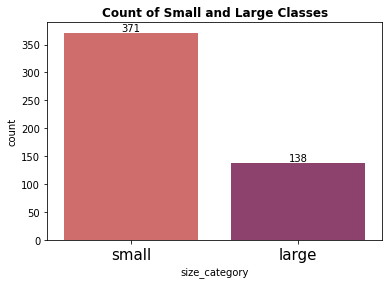

In [ ]:
plt.title('Count of Small and Large Classes',fontweight='bold')
ax = sns.countplot(x='size_category',data=df,palette='flare')
plt.xticks(fontsize=15);
for i in ax.containers:
    ax.bar_label(i,)

<font color='peach'><b>There is class imbalance in the data.

### <font color='maroon'><b>Split into Independent and Dependent variables :

In [ ]:
x = df.drop(['month','day','area','size_category'],axis=1)      # since month and day are already encoded and area categorized
y = df['size_category']

In [ ]:
x.head(3)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
y.value_counts()

small    371
large    138
Name: size_category, dtype: int64

### <font color='maroon'><b>Train Test Split :

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0,shuffle=True)

In [ ]:
y_train.value_counts()

small    294
large    113
Name: size_category, dtype: int64

In [ ]:
y_test.value_counts()

small    77
large    25
Name: size_category, dtype: int64

### <font color='orange'><b>Applying SVMSMOTE to correct the imbalanced data :

In [ ]:
from imblearn.over_sampling import SVMSMOTE

In [ ]:
oversample = SVMSMOTE()

In [ ]:
x_train_samp, y_train_samp = oversample.fit_resample(x_train,y_train.ravel())

In [ ]:
print("After OverSampling, counts of label 'small': {}".format(sum(y_train_samp == 'small')))
print("After OverSampling, counts of label 'large': {}".format(sum(y_train_samp == 'large')))

After OverSampling, counts of label 'small': 294
After OverSampling, counts of label 'large': 294


### <font color='maroon'><b>Feature Scaling :

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train_samp)
x_test = scaler.transform(x_test)

In [ ]:
x_train

array([[ 0.29858033, -0.24082796, -0.85203782, ..., -0.04127442,
        -0.1380729 , -0.61666984],
       [ 0.37274988, -0.07988975,  0.78054459, ..., -0.04127442,
        -0.1380729 ,  1.62161328],
       [ 0.46546182, -1.10251797, -2.17967621, ..., -0.04127442,
        -0.1380729 , -0.61666984],
       ...,
       [-1.40731935, -0.71023108,  0.43076891, ..., -0.04127442,
        -0.1380729 , -0.61666984],
       [-0.15632043, -0.79833997,  0.43126527, ..., -0.04127442,
        -0.1380729 , -0.61666984],
       [-0.67624839, -0.76172102,  0.43105898, ..., -0.04127442,
        -0.1380729 , -0.61666984]])

## <font color='magenta'><b>Support Vector Classifier :

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(random_state=0)

In [ ]:
svc.fit(x_train_samp,y_train_samp)

SVC(random_state=0)

In [ ]:
train_pred = svc.predict(x_train_samp)
test_pred = svc.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_train_samp,train_pred)

0.6054421768707483

In [ ]:
accuracy_score(y_test,test_pred)

0.7549019607843137

<font color='peach'><b>This is underfitting.

### <font color='purple'><b>Grid Search CV :

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [ ]:
# create a parameter grid for SVC

param_grid = {'C': [0.1, 10, 100,1000],
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel': ['rbf','linear']}

In [ ]:
kfold = KFold(n_splits=5, random_state=42, shuffle=True)
grid = GridSearchCV(svc, param_grid, cv=kfold, verbose=2, n_jobs=-1)
grid.fit(x_train_samp, y_train_samp)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(random_state=0), n_jobs=-1,
             param_grid={'C': [0.1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [ ]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

In [ ]:
grid.best_score_

0.7516586991163261

In [ ]:
best_svc = grid.best_estimator_

In [ ]:
train_pred1 = best_svc.predict(x_train_samp)
test_pred1 = best_svc.predict(x_test)

In [ ]:
accuracy_score(y_train_samp,train_pred1)

0.7874149659863946

In [ ]:
accuracy_score(y_test,test_pred1)

0.5882352941176471

<font color='peach'><b>The model is overfitting now.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train_samp, train_pred1))

              precision    recall  f1-score   support

       large       0.90      0.65      0.75       294
       small       0.72      0.93      0.81       294

    accuracy                           0.79       588
   macro avg       0.81      0.79      0.78       588
weighted avg       0.81      0.79      0.78       588



In [ ]:
print(classification_report(y_test, test_pred1))

              precision    recall  f1-score   support

       large       0.21      0.24      0.22        25
       small       0.74      0.70      0.72        77

    accuracy                           0.59       102
   macro avg       0.47      0.47      0.47       102
weighted avg       0.61      0.59      0.60       102



In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

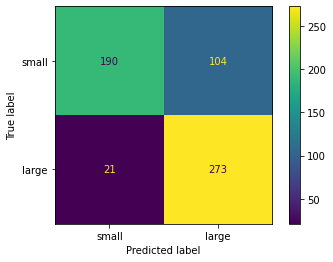

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train_samp,train_pred1,display_labels=y.unique())
plt.grid(False);

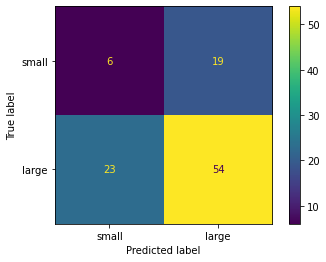

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,test_pred1,display_labels=y.unique())
plt.grid(False);

In [ ]:
# with trial and error

svc2 = SVC(random_state=0,kernel='poly',degree=35)

In [ ]:
svc2.fit(x_train_samp,y_train_samp)

SVC(degree=35, kernel='poly', random_state=0)

In [ ]:
train_pred2 = svc2.predict(x_train_samp)
test_pred2 = svc2.predict(x_test)

In [ ]:
accuracy_score(y_train_samp,train_pred2)

0.7585034013605442

In [ ]:
accuracy_score(y_test,test_pred2)

0.7549019607843137

<font color='peach'><b>Now the model is neither overfitting nor underfitting.

In [ ]:
print(classification_report(y_train_samp, train_pred2))

              precision    recall  f1-score   support

       large       0.92      0.56      0.70       294
       small       0.69      0.95      0.80       294

    accuracy                           0.76       588
   macro avg       0.80      0.76      0.75       588
weighted avg       0.80      0.76      0.75       588



In [ ]:
print(classification_report(y_test, test_pred2))

              precision    recall  f1-score   support

       large       0.00      0.00      0.00        25
       small       0.75      1.00      0.86        77

    accuracy                           0.75       102
   macro avg       0.38      0.50      0.43       102
weighted avg       0.57      0.75      0.65       102



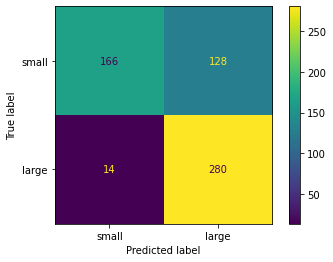

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train_samp,train_pred2,display_labels=y.unique())
plt.grid(False);

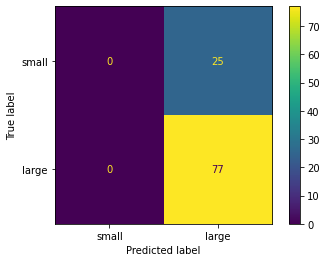

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,test_pred2,display_labels=y.unique())
plt.grid(False);